# Import data

In [970]:
import pandas as pd

# Read all sheets into a dictionary of DataFrames
# dfs = pd.read_excel('experiment-a-b.xlsx', sheet_name=None)
# dfs = pd.read_excel('result_abcd.xlsx', sheet_name=None)
# dfs = pd.read_excel('result_exp_a_j_vary_d.xlsx', sheet_name=None)
dfs = pd.read_excel('result_exp_0730.xlsx', sheet_name=None)


# Print the names of the sheets
print(dfs.keys())

dict_keys(['ΔΩ < 0, Δ𝜎 > 0, Δ𝛿 > 0', 'ΔΩ < 0', 'ΔΩ > 0, Δ𝜎 > 0, Δ𝛿 > 0', 'ΔΩ < 0, Δ𝜎 < 0, Δ𝛿 < 0', 'ΔΩ > 0, Δ𝜎 < 0, Δ𝛿 < 0', 'ΔΩ > 0', 'Δ𝜂 > 0 in X', 'Δ𝜂 < 0 in X', 'Δ𝜂 > 0 in 𝑝0', 'Δ𝜂 < 0 in 𝑝0', 'vary |D| size', 'vary |S|'])


In [840]:
dfs_iapriori = pd.read_excel('result_fp_growth.xlsx', sheet_name=None)

print(dfs_iapriori.keys())

dict_keys(['Δ𝜂 > 0 in X', 'Δ𝜂 < 0 in X', 'Δ𝜂 > 0 in 𝑝0', 'Δ𝜂 < 0 in 𝑝0', 'ΔΩ > 0', 'ΔΩ < 0', 'ΔΩ > 0, Δ𝜎 > 0, Δ𝛿 > 0', 'ΔΩ < 0, Δ𝜎 < 0, Δ𝛿 < 0', 'ΔΩ > 0, Δ𝜎 < 0, Δ𝛿 < 0', 'ΔΩ < 0, Δ𝜎 > 0, Δ𝛿 > 0', 'vary |D| size', 'vary n, oemga', 'vary n, theta'])


In [931]:
dfs_dcfinder = pd.read_excel('DCFinder.xlsx', sheet_name=None)

print(dfs_dcfinder.keys())

dict_keys(['ΔΩ < 0, Δ𝜎 > 0, Δ𝛿 > 0', 'ΔΩ < 0', 'ΔΩ > 0, Δ𝜎 > 0, Δ𝛿 > 0', 'ΔΩ < 0, Δ𝜎 < 0, Δ𝛿 < 0', 'ΔΩ > 0, Δ𝜎 < 0, Δ𝛿 < 0', 'ΔΩ > 0', 'Δ𝜂 > 0 in X', 'Δ𝜂 < 0 in X', 'Δ𝜂 > 0 in 𝑝0', 'Δ𝜂 < 0 in 𝑝0', 'vary |D| size'])


In [871]:
def preprocess_dcfinder(_df):
    # 1. Drop rows where 'Mining time' is NaN or empty string
    filtered_df = _df[_df['Mining time'].notna() & (_df['Mining time'] != '')]

    # 2. Group and compute mean
    _df = filtered_df.groupby([
        'Baseline',
        'old support',
        'old confidence',
        'new support',
        'new confidence',
        'old eta',
        'new eta'
    ])['Mining time'].mean().reset_index()
    
    # 3. Compute scale factor of 'new support' over 'old support'
    _df['supportScale'] = _df['new support'] / _df['old support']

    # 4. Compute absolute difference of 'new confidence' over 'old confidence'
    _df['confDiff'] = _df['new confidence'] - _df['old confidence']
    
    # 5. Compute scale factor of 'new support' over 'old support'
    _df['etaDiff'] = _df['new eta'] - _df['old eta']
    
    
    _df['Baseline'] = _df['Baseline'].replace({
    'IncMiner': 'IncDCFinder',
    'batch': 'DCFinder'
    })
    
    _df = _df.rename(columns={'Mining time': 'time'})
    
    _df['time'] = _df['time'].apply(lambda x: 'timeout' if x > 35000 else x)
    
    return _df

In [872]:
df_dcfinder = dfs_dcfinder['Δ𝜂 > 0 in X']
preprocess_dcfinder(df_dcfinder)

,Baseline,old support,old confidence,new support,new confidence,old eta,new eta,time,supportScale,confDiff,etaDiff
0,IncDCFinder,0.000001,0.7,0.000001,0.7,0.7,0.75,672.0,1.0,0.0,0.05
1,IncDCFinder,0.000001,0.7,0.000001,0.7,0.7,0.80,623.0,1.0,0.0,0.10
2,IncDCFinder,0.000001,0.7,0.000001,0.7,0.7,0.85,632.0,1.0,0.0,0.15
3,IncDCFinder,0.000001,0.7,0.000001,0.7,0.7,0.90,676.0,1.0,0.0,0.20
4,DCFinder,0.000001,0.7,0.000001,0.7,0.7,0.75,timeout,1.0,0.0,0.05
5,DCFinder,0.000001,0.7,0.000001,0.7,0.7,0.80,timeout,1.0,0.0,0.10
6,DCFinder,0.000001,0.7,0.000001,0.7,0.7,0.85,timeout,1.0,0.0,0.15
7,DCFinder,0.000001,0.7,0.000001,0.7,0.7,0.90,timeout,1.0,0.0,0.20


# Helper functions

In [728]:
import matplotlib.pyplot as plt
import numpy as np

# Set default figure size (width, height in inches)
plt.rcParams['figure.figsize'] = [4, 3]
# plt.rcParams['figure.figsize'] = [8, 6]

plt.rcParams['font.size'] = 16

plt.rcParams['lines.markersize'] = 10  # Default marker size is 6

In [560]:
VERBOSE = False

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colorMap = {
    "batch": colors[1],
    "IncMiner": colors[0],
    "IncMinerT": colors[6],
    "IncMinerNS": colors[4],
    "IncMinerNoO": colors[2],
    "IApriori": colors[3],
    "DCFinder": colors[5],
    "IncDCFinder": colors[8],
}

markerMap = {
    "batch": '^',
    "IncMiner": 's',
    "IncMinerT": 'o',
    "IncMinerNS": '*',
    "IncMinerNoO": 'v',
    "IApriori": '+',
    "DCFinder": 'x',
    "IncDCFinder": 'D',
}

legendName = {
    "batch": "BatchMiner",
    "IncMiner": r"$IncMiner_\Omega$",
    "IncMinerT": r"$IncMiner_\Theta$",
    "IncMinerNS": r"$IncMiner_{NS}$",
    "IncMinerNoO": r"$IncMiner_{-\Omega}$",
    "IApriori": r"$IApriori_\Theta$",
    "DCFinder": "DCFinder",
    "IncDCFinder": "IncDCFinder",
}

markerStyleMap = {
    "batch": {'markerfacecolor': 'none', 'markeredgewidth': 1.0},
    "IncMiner": {'markerfacecolor': 'none', 'markeredgewidth': 1.5},
    "IncMinerT": {'markerfacecolor': 'none', 'markeredgewidth': 1.5, 'markersize':8},
    
    "IncMinerNS": {'markerfacecolor': 'none', 'markeredgewidth': 1.0, 'markersize':10},
    "IncMinerNoO": {'markerfacecolor': 'none', 'markeredgewidth': 1.0, 'markersize':10},
    "IApriori": {'markerfacecolor': 'auto', 'markeredgewidth': 1.5},
    "DCFinder": {'markerfacecolor': 'auto', 'markeredgewidth': 1.0},
    "IncDCFinder": {'markerfacecolor': 'none', 'markeredgewidth': 1.0},
}


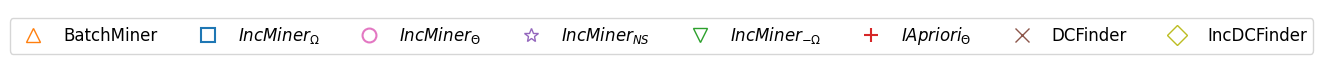

In [561]:
# Create legend elements, skipping "IncMiner1.0"
legend_elements = [
    plt.Line2D([0], [0], color=colorMap[label], marker=markerMap[label], 
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
               linestyle='', label=legendName[label])
    for label in colorMap.keys() if label != "IncMiner1.0"
]

# Create a new figure
fig, ax = plt.subplots(figsize=(10, 1))  # Adjust width and height for a wide flat layout

# Remove axes
ax.axis('off')

# Add the legend
ax.legend(
    handles=legend_elements,
    loc='center',
    frameon=True,
    fontsize=12,
    ncol=len(legend_elements),  # Arrange all legend entries in a single row
)

# Adjust layout
plt.tight_layout()

# Save or display the legend-only plot
plt.savefig("plots/legend.pdf", bbox_inches='tight', pad_inches=0)
plt.show()

In [547]:
ylabel_time = "Running time (s)"

In [369]:
def post_process(_df):
    # 1. Compute scale factor of 'new support' over 'old support'
    _df['supportScale'] = _df['new support'] / _df['old support']

    # 2. Compute absolute difference of 'new confidence' over 'old confidence'
    _df['confDiff'] = _df['new confidence'] - _df['old confidence']
    
    # 4. Convert Mining time scale, but leave as is if 'timeout'
    _df['time'] = _df['Mining time'].apply(
        lambda x: max(x,1000) / 1000 if isinstance(x, (int, float)) else x
    )

    return _df

In [370]:
def compute_speedup(df, baseline_label, target_labels, metric="time"):
    """
    Compute the maximal and average speedup for target labels compared to a baseline label,
    replacing zero values with 1 to avoid division errors.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing timing data.
        baseline_label (str): The label of the baseline group (e.g., 'batch').
        target_labels (list): A list of labels for the groups to compare against the baseline.
    
    Returns:
        dict: A dictionary with the speedup results for each target label.
    """
    # Group by the "label" column
    groups = df.groupby('Baseline')
    
    # Extract baseline times
    if baseline_label not in groups.groups:
        raise ValueError(f"Baseline label '{baseline_label}' not found in data.")
    
    # times_baseline = groups.get_group(baseline_label)['time'].replace(0, 1).values  # Replace 0 with 1
    times_baseline = groups.get_group(baseline_label)[metric].apply(lambda x: max(x, 1)).values  # Replace values < 1 with 1

    
    # Initialize results dictionary
    speedup_results = {}
    
    # Compute speedup for each target label
    for label in target_labels:
        if label not in groups.groups:
            print(f"Warning: Target label '{label}' not found in data. Skipping.")
            continue
        
        # times_target = groups.get_group(label)['time'].replace(0, 1).values  # Replace 0 with 1
        times_target = groups.get_group(label)[metric].apply(lambda x: max(x, 1)).values  # Replace values < 1 with 1

        
        # Ensure the baseline and target have the same number of entries
        if len(times_baseline) != len(times_target):
            raise ValueError(f"Mismatch in number of entries for baseline '{baseline_label}' and target '{label}'.")
        
        # Calculate speedup
        speedups = times_baseline / times_target
        
        # Store results
        speedup_results[label] = {
            "max_speedup": speedups.max(),
            "avg_speedup": speedups.mean()
        }
    
    return speedup_results

# Exp-1-a

In [655]:
def pre_process_exp1(_df):
    # 1. Compute scale factor of 'new support' over 'old support'
    _df['etaDiff'] = _df['new eta'] - _df['old eta']

    # 4. Convert Mining time scale, but leave as is if 'timeout'
    _df['time'] = _df['Mining time'].apply(
        lambda x: max(x,1000) / 1000 if isinstance(x, (int, float)) else x
    )

    return _df

In [656]:
# dfs3 = pd.read_excel("rsult_exp_a_0728.xlsx", sheet_name=None)

# print(dfs3.keys())

dict_keys(['Δ𝜂 > 0 in X', 'Sheet2', 'Sheet3'])


In [1047]:
tab = 'Δ𝜂 > 0 in X'
# df = dfs[tab]
df = dfs3[tab]
df = pre_process_exp1(df)
df = post_process(df)


In [1048]:
df_dcfinder = dfs_dcfinder[tab]
df_dcfinder = preprocess_dcfinder(df_dcfinder)

# Select the specified columns from df
selected_columns = [
    'Baseline',
    'old support',
    'old confidence',
    'new support',
    'new confidence',
    'old eta',
    'new eta',
    'time',
    'supportScale',
    'confDiff',
    'etaDiff'
]
df_trimmed = df[selected_columns]

# Append df2 to df_trimmed
df = pd.concat([df_trimmed, df_dcfinder], ignore_index=True)

DCFinder
IncDCFinder
IncMiner
IncMinerNS
IncMinerNoO
batch


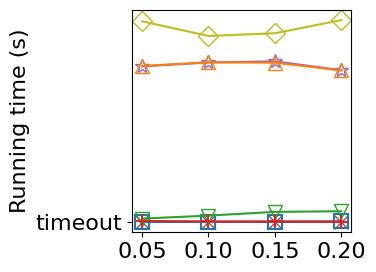

In [1049]:

# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['etaDiff']
    # print (group['time'])
    plt.plot(range(len(X)), group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    

# Add the lien for IApriori
label = "IApriori"
plt.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )  
    
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis

xtick_labels = [f"{value:.2f}" for value in X]
plt.xticks(range(len(X)), xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_hospital_eta_X_increase.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/3011030416.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/3011030416.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


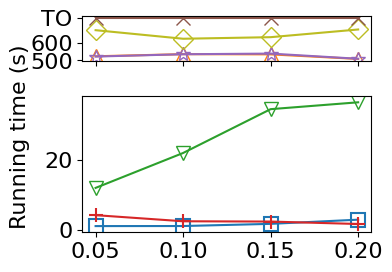

{'IncMiner': {'max_speedup': np.float64(525.8013765978368),
  'avg_speedup': np.float64(388.2048113839239)}}

In [1050]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['batch', 'IncMinerNS']
bottom_labels = ['IncMiner', 'IncMinerNoO']

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df_dcfinder['time'][pd.to_numeric(df_dcfinder['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1
    
# Plot for labels in the top box
groups_dcfinder = df_dcfinder.groupby('Baseline')
for label in ["IncDCFinder"]:
    group = groups_dcfinder.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )    
    
# # Add 'TO' tick to the top subplot
# ax_top.set_yticks(list(ax_top.get_yticks())[:1] + [timeout_value])  # Add timeout_value to y-ticks
# ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])

# Add 'TO' tick to the top subplot
ax_top.set_yticks(list(ax_top.get_yticks())[:3] + [timeout_value])  # Add timeout_value to y-ticks
ax_top.set_yticklabels([str(int(tick)) if tick <= global_max_time else 'TO' for tick in ax_top.get_yticks()[:4]])

# Add the line for DCFinder
label = "DCFinder"
N = len(X)
ax_top.plot(range(N), [timeout_value] * N, label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )    

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    

# Add the lien for IApriori
label = "IApriori"
ax_bottom.plot(range(len(Y)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )    


X = group['etaDiff']
xtick_labels = [f"{value:.2f}" for value in X]
plt.xticks(range(len(X)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_hospital_eta_X_increase.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner'])


In [1051]:
compute_speedup(df, 'IncMinerNoO', ['IncMiner'])

{'IncMiner': {'max_speedup': np.float64(21.581120943952804),
  'avg_speedup': np.float64(16.85459688931615)}}

In [733]:
compute_speedup(df, 'batch', ['IncMinerNoO'])

{'IncMinerNoO': {'max_speedup': np.float64(43.7760656561427),
  'avg_speedup': np.float64(24.37986420202952)}}

In [901]:
compute_speedup(df, 'IncDCFinder', ['IncMiner'])

{'IncMiner': {'max_speedup': np.float64(672.0),
  'avg_speedup': np.float64(477.07475621034393)}}

## exp1-b

In [1052]:
tab = 'Δ𝜂 < 0 in X'
df = dfs[tab]
df = pre_process_exp1(df)

In [1053]:
df = post_process(df)

df_dcfinder = dfs_dcfinder[tab]
df_dcfinder = preprocess_dcfinder(df_dcfinder)

# Select the specified columns from df
selected_columns = [
    'Baseline',
    'old support',
    'old confidence',
    'new support',
    'new confidence',
    'old eta',
    'new eta',
    'time',
    'supportScale',
    'confDiff',
    'etaDiff'
]
df_trimmed = df[selected_columns]

# Append df2 to df_trimmed

df = pd.concat([df_trimmed, df_dcfinder], ignore_index=True)

IncDCFinder
IncMiner
IncMinerNS
IncMinerNoO
batch


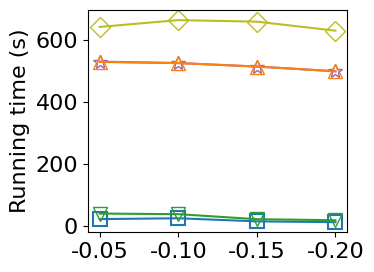

In [1054]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['etaDiff']
    # print (group['time'])
    plt.plot(range(len(X)), group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis

xtick_labels = [f"{value:.2f}" for value in X]
plt.xticks(range(len(X)), xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_hospital_eta_X_decrease.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/3059718188.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


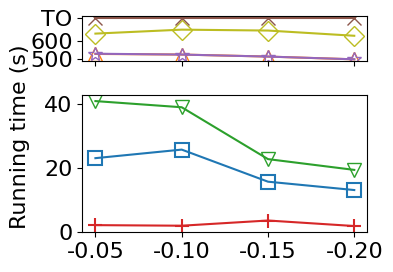

{'IncMiner': {'max_speedup': np.float64(38.19894366197183),
  'avg_speedup': np.float64(28.630021842174862)}}

In [1055]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['batch', 'IncMinerNS']
bottom_labels = ['IncMiner', 'IncMinerNoO']



# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
    # Add 'TO' tick to the top subplot
    # ax_top.set_yticks(list(ax_top.get_yticks())[:1] + [timeout_value])  # Add timeout_value to y-ticks
    # ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])
    
# Plot for labels i# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df_dcfinder['time'][pd.to_numeric(df_dcfinder['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

groups_dcfinder = df_dcfinder.groupby('Baseline')
for label in ["IncDCFinder"]:
    group = groups_dcfinder.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )    
    
# # Add 'TO' tick to the top subplot
# ax_top.set_yticks(list(ax_top.get_yticks())[:1] + [timeout_value])  # Add timeout_value to y-ticks
# ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])

# Add 'TO' tick to the top subplot
ax_top.set_yticks(list(ax_top.get_yticks())[:3] + [timeout_value])  # Add timeout_value to y-ticks
ax_top.set_yticklabels([str(int(tick)) if tick <= global_max_time else 'TO' for tick in ax_top.get_yticks()[:4]])

# Add the line for DCFinder
label = "DCFinder"
N = len(X)
ax_top.plot(range(N), [timeout_value] * N, label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )        

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
# Add the lien for IApriori
label = "IApriori"
ax_bottom.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )        


# xtick_labels = [fr"$\times 10^{{{int(np.log10(value))}}}$" for value in X]
xtick_labels = [f"{value:.2f}" for value in X]
plt.xticks(range(len(X)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_hospital_eta_X_decrease.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner'])

In [910]:
compute_speedup(df, 'IncDCFinder', ['IncMiner'])

{'IncMiner': {'max_speedup': np.float64(48.22412737293325),
  'avg_speedup': np.float64(36.017863165283345)}}

## exp1-c

In [956]:
dfs_1c = pd.read_excel("result_exp_(c)_0730.xlsx", sheet_name=None)
print (dfs_1c.keys())

dict_keys(['Δ𝜂 > 0 in 𝑝0'])


In [1056]:
tab = 'Δ𝜂 > 0 in 𝑝0'
# df = dfs[tab]
df = dfs_1c[tab]
df = pre_process_exp1(df)

In [1057]:
df = post_process(df)

df_dcfinder = dfs_dcfinder[tab]
df_dcfinder = preprocess_dcfinder(df_dcfinder)

# Select the specified columns from df
selected_columns = [
    'Baseline',
    'old support',
    'old confidence',
    'new support',
    'new confidence',
    'old eta',
    'new eta',
    'time',
    'supportScale',
    'confDiff',
    'etaDiff'
]
df_trimmed = df[selected_columns]

# Append df2 to df_trimmed

df = pd.concat([df_trimmed, df_dcfinder], ignore_index=True)

In [1058]:
df_dcfinder

,Baseline,old support,old confidence,new support,new confidence,old eta,new eta,time,supportScale,confDiff,etaDiff
0,IncDCFinder,0.000001,0.7,0.000001,0.7,0.7,0.75,654.0,1.0,0.0,0.05
1,IncDCFinder,0.000001,0.7,0.000001,0.7,0.7,0.80,639.0,1.0,0.0,0.10
2,IncDCFinder,0.000001,0.7,0.000001,0.7,0.7,0.85,678.0,1.0,0.0,0.15
3,IncDCFinder,0.000001,0.7,0.000001,0.7,0.7,0.90,677.0,1.0,0.0,0.20


IncDCFinder
IncMiner
IncMinerNS
IncMinerNoO
batch


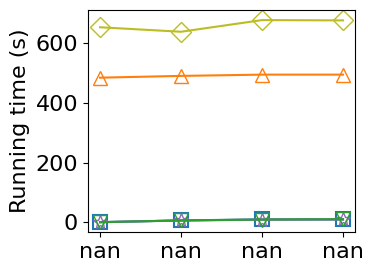

In [1059]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['etaDiff']
    # print (group['time'])
    plt.plot(range(len(X)), group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis

xtick_labels = [f"{value:.2f}" for value in X]
plt.xticks(range(len(X)), xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_hospital_eta_p_increase.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/390192336.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


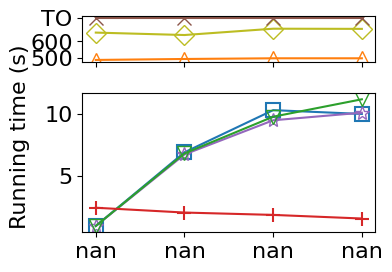

{'IncMiner': {'max_speedup': np.float64(485.12),
  'avg_speedup': np.float64(163.45964453342233)}}

In [1061]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['batch']
bottom_labels = ['IncMiner', 'IncMinerNS', 'IncMinerNoO']

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
    # Add 'TO' tick to the top subplot
    # ax_top.set_yticks(list(ax_top.get_yticks())[:1] + [timeout_value])  # Add timeout_value to y-ticks
    # ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])
    # Plot for labels i

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df_dcfinder['time'][pd.to_numeric(df_dcfinder['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

groups_dcfinder = df_dcfinder.groupby('Baseline')
for label in ["IncDCFinder"]:
    group = groups_dcfinder.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )    
    
# # Add 'TO' tick to the top subplot
# ax_top.set_yticks(list(ax_top.get_yticks())[:1] + [timeout_value])  # Add timeout_value to y-ticks
# ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])

# Add 'TO' tick to the top subplot
ax_top.set_yticks(list(ax_top.get_yticks())[:3] + [timeout_value])  # Add timeout_value to y-ticks
ax_top.set_yticklabels([str(int(tick)) if tick <= global_max_time else 'TO' for tick in ax_top.get_yticks()[:4]])

# Add the line for DCFinder
label = "DCFinder"
N = len(X)
ax_top.plot(range(N), [timeout_value] * N, label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )        

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )

# Add the lien for IApriori
label = "IApriori"
ax_bottom.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )        


# xtick_labels = [fr"$\times 10^{{{int(np.log10(value))}}}$" for value in X]
xtick_labels = [f"{value:.2f}" for value in X]
plt.xticks(range(len(X)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_hospital_eta_p_increase.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner'])

In [1062]:
# Compute speedup
compute_speedup(df, 'IncDCFinder', ['IncMiner'])

{'IncMiner': {'max_speedup': np.float64(654.0),
  'avg_speedup': np.float64(220.00998730123484)}}

## exp1-d

In [1063]:
tab = 'Δ𝜂 < 0 in 𝑝0'
df = dfs[tab]
df = pre_process_exp1(df)

In [1064]:
df = post_process(df)

df_dcfinder = dfs_dcfinder[tab]
df_dcfinder = preprocess_dcfinder(df_dcfinder)

# Select the specified columns from df
selected_columns = [
    'Baseline',
    'old support',
    'old confidence',
    'new support',
    'new confidence',
    'old eta',
    'new eta',
    'time',
    'supportScale',
    'confDiff',
    'etaDiff'
]
df_trimmed = df[selected_columns]

# Append df2 to df_trimmed

df = pd.concat([df_trimmed, df_dcfinder], ignore_index=True)

IncDCFinder
IncMiner
IncMinerNS
IncMinerNoO
batch


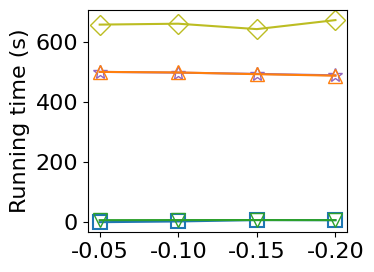

In [1065]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['etaDiff']
    # print (group['time'])
    plt.plot(range(len(X)), group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis

xtick_labels = [f"{value:.2f}" for value in X]
plt.xticks(range(len(X)), xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_hospital_eta_p_decrease.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/2039389582.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


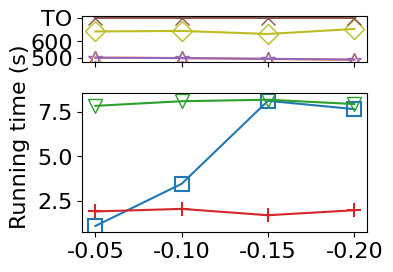

{'IncMiner': {'max_speedup': np.float64(466.10687732342006),
  'avg_speedup': np.float64(183.90726147999084)}}

In [1066]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['batch', 'IncMinerNS', "IncDCFinder"]
bottom_labels = ['IncMiner', 'IncMinerNoO']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
    # Add 'TO' tick to the top subplot
    # ax_top.set_yticks(list(ax_top.get_yticks())[:1] + [timeout_value])  # Add timeout_value to y-ticks
    # ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])
    
# Add 'TO' tick to the top subplot
ax_top.set_yticks(list(ax_top.get_yticks())[:3] + [timeout_value])  # Add timeout_value to y-ticks
ax_top.set_yticklabels([str(int(tick)) if tick <= global_max_time else 'TO' for tick in ax_top.get_yticks()[:4]])

# Add the line for DCFinder
label = "DCFinder"
N = len(X)
ax_top.plot(range(N), [timeout_value] * N, label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )        

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )

# Add the lien for IApriori
label = "IApriori"
ax_bottom.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )        

# xtick_labels = [fr"$\times 10^{{{int(np.log10(value))}}}$" for value in X]
xtick_labels = [f"{value:.2f}" for value in X]
plt.xticks(range(len(X)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_hospital_eta_p_decrease.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner'])

In [921]:
compute_speedup(df, 'IncDCFinder', ['IncMiner'])

{'IncMiner': {'max_speedup': np.float64(612.453531598513),
  'avg_speedup': np.float64(242.92091193524826)}}

# Exp-1-e


In [1042]:
# dfs = pd.read_excel('result_e-j.xlsx', sheet_name=None)
# dfs = pd.read_excel('result_实验e-j_0716.xlsx', sheet_name=None)
# dfs = pd.read_excel('result_实验e-j_0717.xlsx', sheet_name=None)
# dfs = pd.read_excel('result_exp_e_j_0718.xlsx', sheet_name=None)
# dfs = pd.read_excel('result_exp_a_j_vary_d.xlsx', sheet_name=None)
print(dfs.keys())

dict_keys(['ΔΩ < 0, Δ𝜎 > 0, Δ𝛿 > 0', 'ΔΩ < 0', 'ΔΩ > 0, Δ𝜎 > 0, Δ𝛿 > 0', 'ΔΩ < 0, Δ𝜎 < 0, Δ𝛿 < 0', 'ΔΩ > 0, Δ𝜎 < 0, Δ𝛿 < 0', 'ΔΩ > 0', 'Δ𝜂 > 0 in X', 'Δ𝜂 < 0 in X', 'Δ𝜂 > 0 in 𝑝0', 'Δ𝜂 < 0 in 𝑝0', 'vary |D| size', 'vary |S|'])


In [1043]:
tab = 'ΔΩ > 0'
df = dfs[tab]
df = pre_process_exp1(df)
df = post_process(df)
df = df.dropna(subset=['time'])

In [1044]:
df = post_process(df)

df_dcfinder = dfs_dcfinder[tab]
df_dcfinder = preprocess_dcfinder(df_dcfinder)

# Select the specified columns from df
selected_columns = [
    'Baseline',
    'old support',
    'old confidence',
    'new support',
    'new confidence',
    'old eta',
    'new eta',
    'time',
    'supportScale',
    'confDiff',
    'etaDiff'
]
df_trimmed = df[selected_columns]

# Append df2 to df_trimmed

df = pd.concat([df_trimmed, df_dcfinder], ignore_index=True)

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['supportScale'] = _df['new support'] / _df['old support']
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['confDiff'] = _df['new confidence'] - _df['old confidence']
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:9: SettingWithCopyWarning: 
A value is trying to be se

IncDCFinder
IncMiner
IncMinerNS
IncMinerNoO
batch


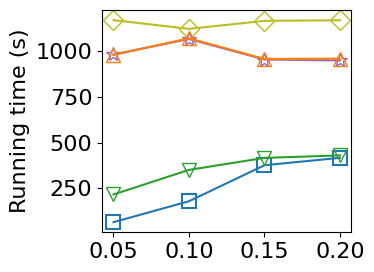

{'IncMiner': {'max_speedup': np.float64(14.960133650677408),
  'avg_speedup': np.float64(6.437586992323988)}}

In [1045]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['etaDiff']
    # print (group['time'])
    plt.plot(range(len(X)), group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis


# xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
xtick_labels = [f"{value:.2f}" for value in X]
plt.xticks(range(len(X)), xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_inspection_omega>0.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 


# Compute speedup
compute_speedup(df, 'batch', ['IncMiner'])

IncMiner 65.544 417.615
IncMinerNoO 217.073 430.779


/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/3959753926.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


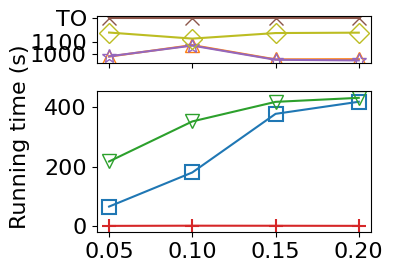

{'IncMiner': {'max_speedup': np.float64(14.960133650677408),
  'avg_speedup': np.float64(6.437586992323988)}}

In [1046]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['batch', 'IncMinerNS', 'IncDCFinder']
bottom_labels = ['IncMiner', 'IncMinerNoO']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    

# Add 'TO' tick to the top subplot
ax_top.set_yticks(list(ax_top.get_yticks())[:3] + [timeout_value])  # Add timeout_value to y-ticks
ax_top.set_yticklabels([str(int(tick)) if tick <= global_max_time else 'TO' for tick in ax_top.get_yticks()[:4]])

# Add the line for DCFinder
label = "DCFinder"
N = len(X)
ax_top.plot(range(N), [timeout_value] * N, label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )    
        

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    print (label, min(Y), max(Y))
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )

# Add the lien for IApriori
label = "IApriori"
ax_bottom.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )        

xtick_labels = [f"{value:.2f}" for value in X]
plt.xticks(range(len(X)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_inspection_omega_largerthan_0.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner'])

In [926]:
# Compute speedup
compute_speedup(df, 'IncDCFinder', ['IncMiner'])

{'IncMiner': {'max_speedup': np.float64(17.865861100939828),
  'avg_speedup': np.float64(7.499243173927117)}}

## Exp1-f

In [932]:
tab = 'ΔΩ < 0'
df = dfs[tab]
df = pre_process_exp1(df)
df = post_process(df)
df = df.dropna(subset=['time'])

In [933]:
df = post_process(df)

df_dcfinder = dfs_dcfinder[tab]
df_dcfinder = preprocess_dcfinder(df_dcfinder)

# Select the specified columns from df
selected_columns = [
    'Baseline',
    'old support',
    'old confidence',
    'new support',
    'new confidence',
    'old eta',
    'new eta',
    'time',
    'supportScale',
    'confDiff',
    'etaDiff'
]
df_trimmed = df[selected_columns]

# Append df2 to df_trimmed

df = pd.concat([df_trimmed, df_dcfinder], ignore_index=True)

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['supportScale'] = _df['new support'] / _df['old support']
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['confDiff'] = _df['new confidence'] - _df['old confidence']
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:9: SettingWithCopyWarning: 
A value is trying to be se

IncMiner
IncMinerNS
IncMinerNoO
batch


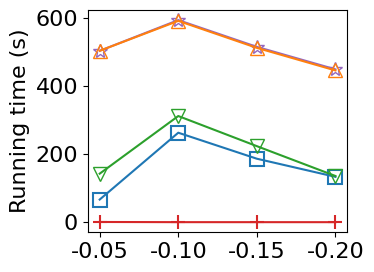

{'IncMiner': {'max_speedup': np.float64(7.502018020701468),
  'avg_speedup': np.float64(3.9554639237743405)}}

In [747]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['etaDiff']
    # print (group['time'])
    plt.plot(range(len(X)), group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
    

# Add the lien for IApriori
label = "IApriori"
plt.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )      
    
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis


# xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
xtick_labels = [f"{value:.2f}" for value in X]
plt.xticks(range(len(X)), xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_inspection_omega<0.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

compute_speedup(df, 'batch', ['IncMiner'])

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/3045662493.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


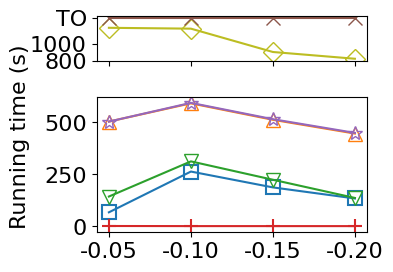

{'IncMiner': {'max_speedup': np.float64(7.502018020701468),
  'avg_speedup': np.float64(3.9554639237743405)}}

In [935]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['IncDCFinder']
bottom_labels = ['batch', 'IncMinerNS', 'IncMiner', 'IncMinerNoO']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    

# Add 'TO' tick to the top subplot
ax_top.set_yticks(list(ax_top.get_yticks())[:2] + [timeout_value])  # Add timeout_value to y-ticks
ax_top.set_yticklabels([str(int(tick)) if tick <= global_max_time else 'TO' for tick in ax_top.get_yticks()[:3]])

# Add the line for DCFinder
label = "DCFinder"
N = len(X)
ax_top.plot(range(N), [timeout_value] * N, label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )    
        

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )

# Add the lien for IApriori
label = "IApriori"
ax_bottom.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )        

xtick_labels = [f"{value:.2f}" for value in X]
plt.xticks(range(len(X)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_inspection_omega_smallerthan_0.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner'])

In [936]:
compute_speedup(df, 'IncDCFinder', ['IncMiner'])

{'IncMiner': {'max_speedup': np.float64(17.648372924268376),
  'avg_speedup': np.float64(8.270902012683326)}}

# Exp1-g

In [960]:
# Re-run results

# dfs2 = pd.read_excel("result_g_j_incMinerNoO.xlsx", sheet_name=None)
# print (dfs2.keys())

In [1017]:


tab = 'ΔΩ > 0, Δ𝜎 > 0, Δ𝛿 > 0'
# df = dfs[tab]
df = dfs2[tab]
df = pre_process_exp1(df)
df = post_process(df)
df = df.dropna(subset=['time'])

# chagne name of baseline
df['Baseline'] = df['Baseline'].str.replace(r'\bIncMiner\b', 'IncMinerT', regex=True)

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/2553407957.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Baseline'] = df['Baseline'].str.replace(r'\bIncMiner\b', 'IncMinerT', regex=True)


In [1018]:
df = post_process(df)

df_dcfinder = dfs_dcfinder[tab]
df_dcfinder = preprocess_dcfinder(df_dcfinder)

# Select the specified columns from df
selected_columns = [
    'Baseline',
    'old support',
    'old confidence',
    'new support',
    'new confidence',
    'old eta',
    'new eta',
    'time',
    'supportScale',
    'confDiff',
    'etaDiff'
]
df_trimmed = df[selected_columns]

# Append df2 to df_trimmed

df = pd.concat([df_trimmed, df_dcfinder], ignore_index=True)

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['supportScale'] = _df['new support'] / _df['old support']
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['confDiff'] = _df['new confidence'] - _df['old confidence']
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:9: SettingWithCopyWarning: 
A value is trying to be se

In [1019]:
df

,Baseline,old support,old confidence,new support,new confidence,old eta,new eta,time,supportScale,confDiff,etaDiff
0,IncMinerT,0.000001,0.7,0.00001,0.75,0.7,0.75,72.886,10.0,0.05,0.05
1,IncMinerT,0.000001,0.7,0.00010,0.80,0.7,0.80,20.832,100.0,0.10,0.10
2,IncMinerT,0.000001,0.7,0.00100,0.85,0.7,0.85,7.879,1000.0,0.15,0.15
3,IncMinerT,0.000001,0.7,0.01000,0.90,0.7,0.90,6.063,10000.0,0.20,0.20
4,IncMinerNS,0.000001,0.7,0.00001,0.75,0.7,0.75,276.584,10.0,0.05,0.05
5,IncMinerNS,0.000001,0.7,0.00010,0.80,0.7,0.80,69.136,100.0,0.10,0.10
6,IncMinerNS,0.000001,0.7,0.00100,0.85,0.7,0.85,25.939,1000.0,0.15,0.15
7,IncMinerNS,0.000001,0.7,0.01000,0.90,0.7,0.90,22.149,10000.0,0.20,0.20
8,IncMinerNoO,0.000001,0.7,0.00001,0.75,0.7,0.75,306.268,10.0,0.05,0.05
9,IncMinerNoO,0.000001,0.7,0.00010,0.80,0.7,0.80,285.701,100.0,0.10,0.10


IncDCFinder
IncMinerNS
IncMinerNoO
IncMinerT
batch


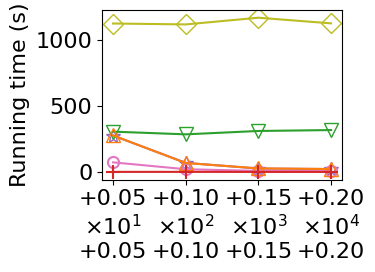

{'IncMinerT': {'max_speedup': np.float64(3.81292703674231),
  'avg_speedup': np.float64(3.536963686167397)}}

In [1020]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['etaDiff']
    # print (group['time'])
    plt.plot(range(len(X)), group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
    

# Add the lien for IApriori
label = "IApriori"
plt.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )      
    
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis


xtick_labels = [f"{ed:+.2f}" + "\n" + fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ed, ss, cd in zip(group['etaDiff'], group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_inspection_omega+_p+.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 


compute_speedup(df, 'batch', ['IncMinerT'])

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/1898730599.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


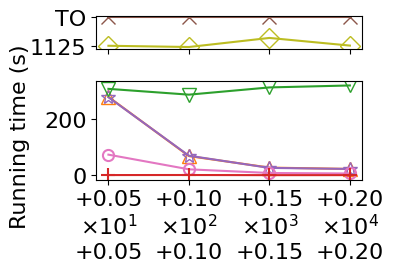

{'IncMinerT': {'max_speedup': np.float64(3.81292703674231),
  'avg_speedup': np.float64(3.536963686167397)}}

In [1021]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['IncDCFinder']
bottom_labels = ['batch', 'IncMinerNS', 'IncMinerT', 'IncMinerNoO']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    

# Add 'TO' tick to the top subplot
ax_top.set_yticks(list(ax_top.get_yticks())[:2] + [timeout_value])  # Add timeout_value to y-ticks
ax_top.set_yticklabels([str(int(tick)) if tick <= global_max_time else 'TO' for tick in ax_top.get_yticks()[:3]])

# Add the line for DCFinder
label = "DCFinder"
N = len(X)
ax_top.plot(range(N), [timeout_value] * N, label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )    
        

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )

# Add the lien for IApriori
label = "IApriori"
ax_bottom.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )        

# xtick_labels = [f"{value:.2f}" for value in X]
xtick_labels = [f"{ed:+.2f}" + "\n" + fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ed, ss, cd in zip(group['etaDiff'], group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_inspection_omega+_p+.pdf"

plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMinerT'])

In [940]:
# Compute speedup
compute_speedup(df, 'IncDCFinder', ['IncMinerT'])

{'IncMinerT': {'max_speedup': np.float64(186.21144647864094),
  'avg_speedup': np.float64(101.06223872611706)}}

## Exp1-h

In [964]:
dfs_hi = pd.read_excel("result_exp_h_and_i_0810.xlsx", sheet_name=None)

In [1022]:
tab = 'ΔΩ < 0, Δ𝜎 < 0, Δ𝛿 < 0'
# df = dfs_hi[tab]
df = dfs[tab]
df = pre_process_exp1(df)
df = post_process(df)
df = df.dropna(subset=['time'])

# chagne name of baseline
df['Baseline'] = df['Baseline'].str.replace(r'\bIncMiner\b', 'IncMinerT', regex=True)

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/1687558769.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Baseline'] = df['Baseline'].str.replace(r'\bIncMiner\b', 'IncMinerT', regex=True)


In [1023]:
df = post_process(df)

df_dcfinder = dfs_dcfinder[tab]
df_dcfinder = preprocess_dcfinder(df_dcfinder)

# Select the specified columns from df
selected_columns = [
    'Baseline',
    'old support',
    'old confidence',
    'new support',
    'new confidence',
    'old eta',
    'new eta',
    'time',
    'supportScale',
    'confDiff',
    'etaDiff'
]
df_trimmed = df[selected_columns]

# Append df2 to df_trimmed

df = pd.concat([df_trimmed, df_dcfinder], ignore_index=True)

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['supportScale'] = _df['new support'] / _df['old support']
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['confDiff'] = _df['new confidence'] - _df['old confidence']
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:9: SettingWithCopyWarning: 
A value is trying to be se

IncDCFinder
IncMinerNS
IncMinerNoO
IncMinerT
batch


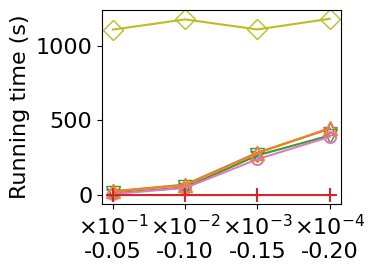

{}

In [1024]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['etaDiff']
    # print (group['time'])
    plt.plot(range(len(X)), group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
    

# Add the lien for IApriori
label = "IApriori"
plt.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )      

# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis


xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_inspection_omega-_p-.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

compute_speedup(df, 'batch', ['IncMiner'])

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/3869818868.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


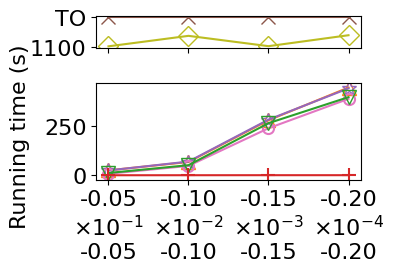

{'IncMinerT': {'max_speedup': np.float64(3.268810205675605),
  'avg_speedup': np.float64(1.7499941378985342)}}

In [1025]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['IncDCFinder']
bottom_labels = ['batch', 'IncMinerNS', 'IncMinerT', 'IncMinerNoO']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    

# # Add 'TO' tick to the top subplot
# ax_top.set_yticks(list(ax_top.get_yticks())[:2] + [timeout_value])  # Add timeout_value to y-ticks
# ax_top.set_yticklabels([str(int(tick)) if tick <= global_max_time else 'TO' for tick in ax_top.get_yticks()[:3]])

# Add 'TO' tick to the top subplot
ax_top.set_yticks(list(ax_top.get_yticks())[:1] + [timeout_value])  # Add timeout_value to y-ticks
ax_top.set_yticklabels([str(int(tick)) if tick <= global_max_time else 'TO' for tick in ax_top.get_yticks()[:2]])

# Add the line for DCFinder
label = "DCFinder"
N = len(X)
ax_top.plot(range(N), [timeout_value] * N, label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )    
        

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )

# Add the lien for IApriori
label = "IApriori"
ax_bottom.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )        

xtick_labels = [f"{ed:+.2f}" + "\n" + fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ed, ss, cd in zip(group['etaDiff'], group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_inspection_omega-_p-.pdf"


plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMinerT'])

In [1001]:
compute_speedup(df, 'IncDCFinder', ['IncMinerT'])

{'IncMinerT': {'max_speedup': np.float64(144.10309815152303),
  'avg_speedup': np.float64(44.072748941897096)}}

## Exp1-i

In [1026]:
tab = 'ΔΩ > 0, Δ𝜎 < 0, Δ𝛿 < 0'
df = dfs[tab]
# df = dfs_hi[tab]
df = pre_process_exp1(df)
df = post_process(df)
df = df.dropna(subset=['time'])

# chagne name of baseline
df['Baseline'] = df['Baseline'].str.replace(r'\bIncMiner\b', 'IncMinerT', regex=True)

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/3345898311.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Baseline'] = df['Baseline'].str.replace(r'\bIncMiner\b', 'IncMinerT', regex=True)


In [1027]:
df = post_process(df)

df_dcfinder = dfs_dcfinder[tab]
df_dcfinder = preprocess_dcfinder(df_dcfinder)

# Select the specified columns from df
selected_columns = [
    'Baseline',
    'old support',
    'old confidence',
    'new support',
    'new confidence',
    'old eta',
    'new eta',
    'time',
    'supportScale',
    'confDiff',
    'etaDiff'
]
df_trimmed = df[selected_columns]

# Append df2 to df_trimmed

df = pd.concat([df_trimmed, df_dcfinder], ignore_index=True)

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['supportScale'] = _df['new support'] / _df['old support']
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['confDiff'] = _df['new confidence'] - _df['old confidence']
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:9: SettingWithCopyWarning: 
A value is trying to be se

IncDCFinder
IncMinerNS
IncMinerNoO
IncMinerT
batch


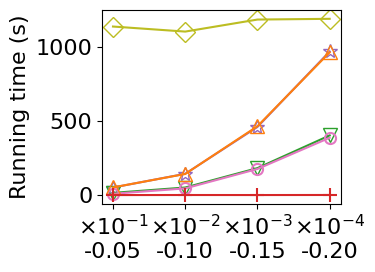

{}

In [1004]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['etaDiff']
    # print (group['time'])
    plt.plot(range(len(X)), group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    

# Add the lien for IApriori
label = "IApriori"
plt.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )      

# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis


xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_inspection_omega+_p-.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

compute_speedup(df, 'batch', ['IncMiner'])

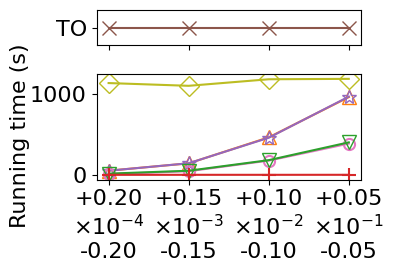

{'IncMinerT': {'max_speedup': np.float64(5.770020075842071),
  'avg_speedup': np.float64(3.5142109688981926)}}

In [1028]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = []
bottom_labels = ['batch', 'IncMinerNS', 'IncMinerT', 'IncMinerNoO', 'IncDCFinder']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    

# Add 'TO' tick to the top subplot
ax_top.set_yticks(list(ax_top.get_yticks())[:2] + [timeout_value])  # Add timeout_value to y-ticks
ax_top.set_yticklabels([str(int(tick)) if tick <= global_max_time else 'TO' for tick in ax_top.get_yticks()[:3]])

# Add the line for DCFinder
label = "DCFinder"
N = len(X)
ax_top.plot(range(N), [timeout_value] * N, label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )    
        

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )

# Add the lien for IApriori
label = "IApriori"
ax_bottom.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )        

xtick_labels = [f"{ed:+.2f}" + "\n" + fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ed, ss, cd in zip(group['etaDiff'], group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_inspection_omega+_p-.pdf"


plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMinerT'])

In [1029]:
group

,Baseline,old support,old confidence,new support,new confidence,old eta,new eta,time,supportScale,confDiff,etaDiff
16,IncDCFinder,0.01,0.9,0.000001,0.70,0.7,0.90,1135.0,0.0001,-0.20,0.20
17,IncDCFinder,0.01,0.9,0.000010,0.75,0.7,0.85,1101.0,0.0010,-0.15,0.15
18,IncDCFinder,0.01,0.9,0.000100,0.80,0.7,0.80,1182.0,0.0100,-0.10,0.10
19,IncDCFinder,0.01,0.9,0.001000,0.85,0.7,0.75,1187.0,0.1000,-0.05,0.05


In [1030]:
compute_speedup(df, 'IncDCFinder', ['IncMinerT'])

{'IncMinerT': {'max_speedup': np.float64(126.5893374972117),
  'avg_speedup': np.float64(40.212659560240034)}}

## exp1-j

In [1031]:
tab = 'ΔΩ < 0, Δ𝜎 > 0, Δ𝛿 > 0'
# df = dfs[tab]
df = dfs2[tab]
df = pre_process_exp1(df)
df = post_process(df)
df = df.dropna(subset='time')

# chagne name of baseline
df['Baseline'] = df['Baseline'].str.replace(r'\bIncMiner\b', 'IncMinerT', regex=True)

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4210125500.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Baseline'] = df['Baseline'].str.replace(r'\bIncMiner\b', 'IncMinerT', regex=True)


In [1032]:
df = post_process(df)

df_dcfinder = dfs_dcfinder[tab]
df_dcfinder = preprocess_dcfinder(df_dcfinder)

# Select the specified columns from df
selected_columns = [
    'Baseline',
    'old support',
    'old confidence',
    'new support',
    'new confidence',
    'old eta',
    'new eta',
    'time',
    'supportScale',
    'confDiff',
    'etaDiff'
]
df_trimmed = df[selected_columns]

# Append df2 to df_trimmed

df = pd.concat([df_trimmed, df_dcfinder], ignore_index=True)

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['supportScale'] = _df['new support'] / _df['old support']
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['confDiff'] = _df['new confidence'] - _df['old confidence']
/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/4251980725.py:9: SettingWithCopyWarning: 
A value is trying to be se

DCFinder
IncDCFinder
IncMinerNS
IncMinerNoO
IncMinerT
batch


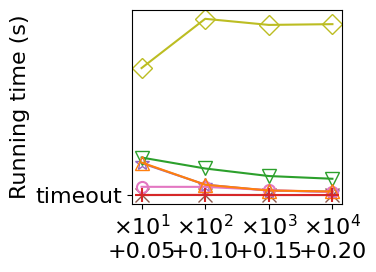

In [1033]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['etaDiff']
    # print (group['time'])
    plt.plot(range(len(X)), group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 

# Add the line for IApriori
label = "IApriori"
plt.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )      
    
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis

xtick_labels = [fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ss, cd in zip(group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp1_inspection_omega-_p+.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/3315287771.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


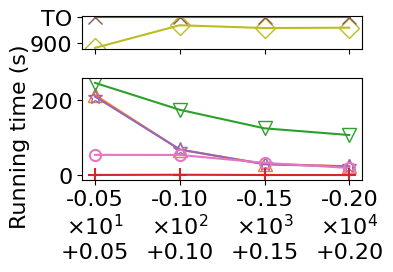

{'IncMinerT': {'max_speedup': np.float64(3.950982569112912),
  'avg_speedup': np.float64(1.8400625026230426)}}

In [1034]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['IncDCFinder']
bottom_labels = ['batch', 'IncMinerNS', 'IncMinerT', 'IncMinerNoO']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    ax_top.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    

# Add 'TO' tick to the top subplot
ax_top.set_yticks(list(ax_top.get_yticks())[:2] + [timeout_value])  # Add timeout_value to y-ticks
ax_top.set_yticklabels([str(int(tick)) if tick <= global_max_time else 'TO' for tick in ax_top.get_yticks()[:3]])

# Add the line for DCFinder
label = "DCFinder"
N = len(X)
ax_top.plot(range(N), [timeout_value] * N, label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )    
        

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    Y = group['time']
    ax_bottom.plot(
        range(len(Y)), group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )

# Add the lien for IApriori
label = "IApriori"
ax_bottom.plot(range(len(X)), dfs_iapriori[tab]['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )        

xtick_labels = [f"{ed:+.2f}" + "\n" + fr"$\times 10^{{{int(np.log10(ss))}}}$"+"\n"+f"{cd:+.2f}" for ed, ss, cd in zip(group['etaDiff'], group['supportScale'], group['confDiff'])]
plt.xticks(range(len(group)), xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp1_inspection_omega-_p+.pdf"

plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMinerT'])

In [1035]:
# Compute speedup
compute_speedup(df, 'IncDCFinder', ['IncMinerT'])

{'IncMinerT': {'max_speedup': np.float64(58.99379012735502),
  'avg_speedup': np.float64(32.51831295506402)}}

# Exp-2

In [819]:
# Read all sheets into a dictionary of DataFrames
dfs = pd.read_excel('result_vary_n_hospital.xlsx', sheet_name=None)


# Print the names of the sheets
print(dfs.keys())

dict_keys(['vary n'])


In [820]:
df = dfs['vary n']
df = pre_process_exp1(df)

IncMiner
IncMinerNS
IncMinerNoO
batch


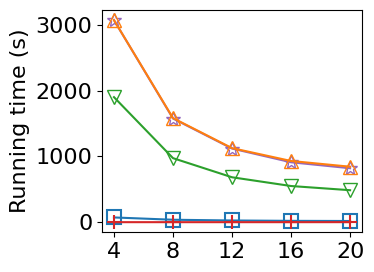

In [821]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['worker instances']
    # print (group['time'])
    plt.plot(X, group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add the line for IApriori
label = "IApriori"
plt.plot(X, dfs_iapriori['vary n, oemga']['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )          
    
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp2_hospital_vary_n.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

batch 3.642019721191332
IncMinerNS 3.7428820258591813
IncMinerNoO 3.9072659354568278
IncMiner 3.9033611185802637 72.583 18.595


/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/2126420963.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


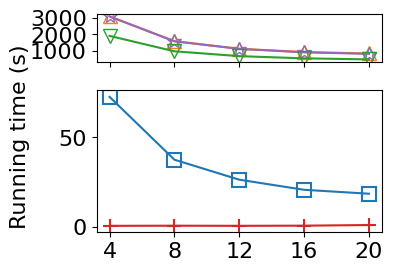

{'IncMiner': {'max_speedup': np.float64(45.37031460069911),
  'avg_speedup': np.float64(43.45923054412942)}}

In [822]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['batch', 'IncMinerNS', 'IncMinerNoO']
bottom_labels = ['IncMiner']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    X = group['worker instances']
    Y = group['time']
    print(label, max(Y)/min(Y))
    ax_top.plot(
        X, group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
    # Add 'TO' tick to the top subplot
    # ax_top.set_yticks(list(ax_top.get_yticks())[:1] + [timeout_value])  # Add timeout_value to y-ticks
    # ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    X = group['worker instances']
    Y = group['time']
    print(label, max(Y)/min(Y), max(Y), min(Y))
    ax_bottom.plot(
        X, group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
# Add the line for IApriori
label = "IApriori"
ax_bottom.plot(X, dfs_iapriori['vary n, oemga']['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )       


xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp2_hospital_vary_n.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner'])

## Inspection

In [1244]:
# Read all sheets into a dictionary of DataFrames
# dfs = pd.read_excel('result_vary_n_inspection.xlsx', sheet_name=None)
dfs = pd.read_excel('result_vary_n_inpsection_0730.xlsx', sheet_name=None)

# Print the names of the sheets

print(dfs.keys())

dict_keys(['Omega', 'Theta'])


In [1245]:
df = dfs['Theta']
df = pre_process_exp1(df)

# chagne name of baseline
df['Baseline'] = df['Baseline'].str.replace(r'\bIncMiner\b', 'IncMinerT', regex=True)

In [1246]:
# DCFinder

dfs_dcfinder_vary_n = pd.read_excel('DCFinder_vary_n_inspection.xlsx', sheet_name=None)



In [1247]:
tab = "Theta"
df_dcfinder = dfs_dcfinder_vary_n[tab]
df_dcfinder = rename(df_dcfinder)

In [1248]:
# Select the specified columns from df
selected_columns = [
    'Baseline',
    'worker instances',
    'time',
]
df_trimmed = df[selected_columns]

# Append df2 to df_trimmed
df = pd.concat([df_trimmed, df_dcfinder[selected_columns]], ignore_index=True)

DCFinder 1.1
IncDCFinder 3.1114982578397212
IncMinerNS 3.962978689525225
IncMinerNoO 4.1116631805329895
IncMinerT 3.9209551323527596
batch 3.923132374533425


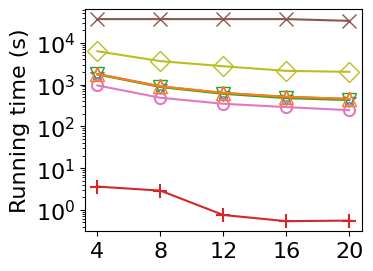

In [1253]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Create a plot for each group
plt.figure()

plt.yscale("log")

for label, group in groups:
    X = group['worker instances']
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    print(label, max(Y)/min(Y))
        
    plt.plot(X, Y, label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add the line for IApriori
label = "IApriori"
X = dfs_iapriori['vary n, theta']['worker instances']
plt.plot(X, dfs_iapriori['vary n, theta']['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )           

# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp2_inspection_vary_n_theta.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

IncDCFinder 2009 6251
DCFinder 33350.0 36685.0
2009
[ 2009. 36685.]
batch 3.923132374533425
IncMinerNS 3.962978689525225
IncMinerT 3.9209551323527596
IncMinerNoO 4.1116631805329895


/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/299542790.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


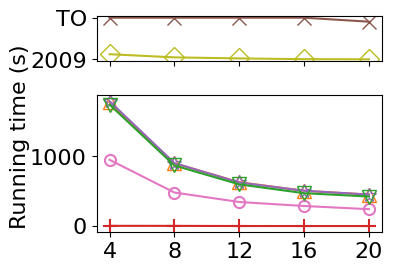

{'IncMinerT': {'max_speedup': np.float64(1.8717429500679135),
  'avg_speedup': np.float64(1.8354103464100582)}}

In [1256]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['IncDCFinder', 'DCFinder']
bottom_labels = ['batch', 'IncMinerNS', 'IncMinerT', 'IncMinerNoO']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
min_Y = global_max_time
for label in top_labels:
    group = groups.get_group(label)
    _ymin = min(group['time'][pd.to_numeric(group['time'], errors='coerce').notna()])
    min_Y = _ymin if _ymin < min_Y else min_Y
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    X = group['worker instances']
    Y = group['time']
    print(label, min(Y), max(Y))
    ax_top.plot(
        X, group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
# Add 'TO' tick to the top subplot
print (min_Y)
ax_top.set_yticks([min_Y] + list(ax_top.get_yticks())[2:2] + [timeout_value])  # Add timeout_value to y-ticks
print (ax_top.get_yticks())
ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    X = group['worker instances']
    Y = group['time']
    print(label, max(Y)/min(Y))
    ax_bottom.plot(
        X, group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
# Add the line for IApriori
label = "IApriori"
X = dfs_iapriori['vary n, theta']['worker instances']
ax_bottom.plot(X, dfs_iapriori['vary n, theta']['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )           
    

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp2_inspection_vary_n_theta.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMinerT'])

In [1226]:
compute_speedup(df, 'IncDCFinder', ['IncMinerT'])

{'IncMinerT': {'max_speedup': np.float64(25.761703214958356),
  'avg_speedup': np.float64(10.55062922250784)}}

### Omega

In [1258]:
tab = 'Omega'
df = dfs[tab]
df = pre_process_exp1(df)

In [1259]:
df_dcfinder = dfs_dcfinder_vary_n[tab]
df_dcfinder = rename(df_dcfinder)

# Select the specified columns from df
selected_columns = [
    'Baseline',
    'worker instances',
    'time',
]
df_trimmed = df[selected_columns]

# Append df2 to df_trimmed
df = pd.concat([df_trimmed, df_dcfinder[selected_columns]], ignore_index=True)

DCFinder 1.0
IncDCFinder 3.8151688973868705
IncMiner 2.0930800542740844
IncMinerNS 3.7738875481181564
IncMinerNoO 1.9204325430168412
batch 3.8281280193236715


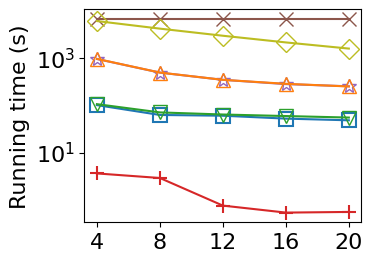

In [1260]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Create a plot for each group
plt.figure()

plt.yscale('log')

for label, group in groups:
    X = group['worker instances']
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    Y = group['time']
    print(label, max(Y)/min(Y))
    plt.plot(X, Y, label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add the line for IApriori
label = "IApriori"
X = dfs_iapriori['vary n, theta']['worker instances']
plt.plot(X, dfs_iapriori['vary n, theta']['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )           

# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp2_inspection_vary_n_omega.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

IncDCFinder 1569 5986
DCFinder 6584.6 6584.6
batch 3.8281280193236715
IncMinerNS 3.7738875481181564
IncMiner 2.0930800542740844
IncMinerNoO 1.9204325430168412


/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/1820758083.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


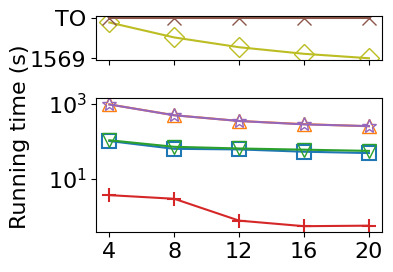

{'IncMiner': {'max_speedup': np.float64(9.483559225682912),
  'avg_speedup': np.float64(6.741019832035592)}}

In [1261]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)

ax_bottom.set_yscale("log")


top_labels = ['IncDCFinder', 'DCFinder']
bottom_labels = ['batch', 'IncMinerNS',  'IncMiner', 'IncMinerNoO']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
min_Y = global_max_time
for label in top_labels:
    group = groups.get_group(label)
    _ymin = group['time'][pd.to_numeric(group['time'], errors='coerce').notna()].min()
    min_Y = _ymin if _ymin < min_Y else min_Y
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    X = group['worker instances']
    Y = group['time']
    print(label, min(Y), max(Y))
    ax_top.plot(
        X, group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
# Add 'TO' tick to the top subplot
ax_top.set_yticks([min_Y] + list(ax_top.get_yticks())[2:2] + [timeout_value])  # Add timeout_value to y-ticks
ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    X = group['worker instances']
    Y = group['time']
    print(label, max(Y)/min(Y))
    ax_bottom.plot(
        X, group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
# Add the line for IApriori
label = "IApriori"
X = dfs_iapriori['vary n, theta']['worker instances']
ax_bottom.plot(X, dfs_iapriori['vary n, theta']['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )           
    

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp2_inspection_vary_n_omega.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner'])

In [1262]:
# Compute speedup
compute_speedup(df, 'IncDCFinder', ['IncMiner'])

{'IncMiner': {'max_speedup': np.float64(124.95564137355181),
  'avg_speedup': np.float64(60.64459971836055)}}

## dblp

In [806]:
# Read all sheets into a dictionary of DataFrames
# dfs = pd.read_excel('result_vary_n_dblp.xlsx', sheet_name=None)
dfs = pd.read_excel('result_vary_n_dblp_0722.xlsx', sheet_name=None)

# Print the names of the sheets

print(dfs.keys())

dict_keys(['Omega', 'Theta', 'Sheet3'])


In [436]:
df = dfs['Omega']
df = pre_process_exp1(df)

IncMiner 1.9777408368472267
IncMinerNS 1.6700363434832193
IncMinerNoO 1.8026264418811002
batch 1.690410014321328


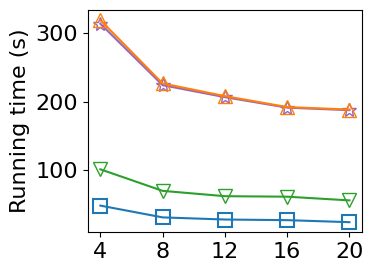

In [437]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    X = group['worker instances']
    Y = group['time']
    print(label, max(Y)/min(Y))
    plt.plot(X, Y, label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp2_dblp_vary_n.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

In [438]:
df = dfs['Theta']
df = pre_process_exp1(df)

IncMiner 1.7898736800893564
IncMinerNS 1.9840097468012383
IncMinerNoO 1.76973414462139
batch 2.0016378122227048


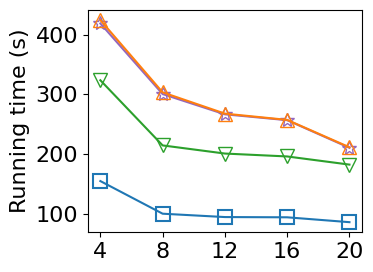

In [439]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    X = group['worker instances']
    Y = group['time']
    print(label, max(Y)/min(Y))
    plt.plot(X, Y, label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp2_dblp_vary_n_theta.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

## vary D

In [625]:
# Read all sheets into a dictionary of DataFrames
# dfs = pd.read_excel('result_vary_d_dblp_0723.xlsx', sheet_name=None)
# dfs = pd.read_excel('result_vary_d_dblp_0724.xlsx', sheet_name=None)

# Print the names of the sheets
print(dfs.keys())

dict_keys(['vary |D| size'])


In [1164]:
dfs_dcfinder_vary_d = pd.read_excel("DCFinder_vary_d_dblp.xlsx", sheet_name=None)



In [1165]:
def rename(_df):
    # 1. Drop rows where 'Mining time' is NaN or empty string
    _df = _df[_df['Mining time'].notna() & (_df['Mining time'] != '')]
    
    _df['Baseline'] = _df['Baseline'].replace({
    'IncMiner': 'IncDCFinder',
    'batch': 'DCFinder'
    })
    
    _df = _df.rename(columns={'Mining time': 'time'})
    
    _df['time'] = _df['time'].apply(lambda x: 'timeout' if x > 35000 else x)
    
    return _df

In [1166]:
tab = 'vary |D| size'
df = dfs[tab]
df = pre_process_exp1(df)
df = post_process(df)

In [1167]:
df_dcfinder = dfs_dcfinder_vary_d['vary |D| size']
df_dcfinder = rename(df_dcfinder)

/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/1311704921.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df['Baseline'] = _df['Baseline'].replace({


In [1168]:
# Select the specified columns from df
selected_columns = [
    'Baseline',
    '|D| size',
    'time',
]
df_trimmed = df[selected_columns]

# Append df2 to df_trimmed
df = pd.concat([df_trimmed, df_dcfinder[selected_columns]], ignore_index=True)

In [1169]:
df

,Baseline,|D| size,time
0,IncMiner,0.2,9.043
1,IncMiner,0.4,19.043
2,IncMiner,0.6,28.424
3,IncMiner,0.8,38.798
4,IncMiner,1.0,48.393
5,IncMinerT,0.2,8.595
6,IncMinerT,0.4,16.671
7,IncMinerT,0.6,26.97
8,IncMinerT,0.8,38.017
9,IncMinerT,1.0,49.053


DCFinder


ValueError: could not convert string to float: 'timeout'

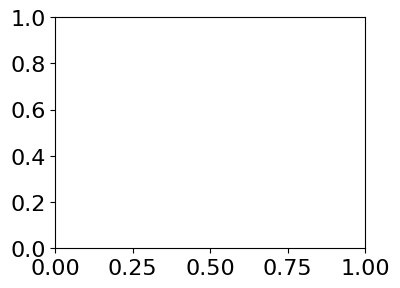

In [1170]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['|D| size']
    # print (group['time'])
    plt.plot(X, group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add the line for IApriori
label = "IApriori"
plt.plot(X, dfs_iapriori['vary |D| size']['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )           
    
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp2_dblp_vary_d_time.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner'])

batch 266.809 984.517
IncMinerNS 265.952 986.217
IncDCFinder 1678.0 5184.0
DCFinder 11864.0 23034.000000000004
265.952
[  265.952 23034.   ]
IncMiner 48.393
IncMinerT 49.053
IncMinerNoO 106.117


/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/670706110.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


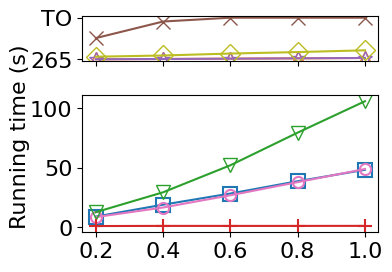

{'IncMiner': {'max_speedup': np.float64(29.504478602233778),
  'avg_speedup': np.float64(22.828149584645725)}}

In [1171]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [1, 3]}  # Set the relative heights
)


top_labels = ['batch', 'IncMinerNS', 'IncDCFinder', 'DCFinder']
bottom_labels = ['IncMiner','IncMinerT', 'IncMinerNoO']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
min_Y = global_max_time
for label in top_labels:
    group = groups.get_group(label)
    _ymin = min(group['time'][pd.to_numeric(group['time'], errors='coerce').notna()])
    min_Y = _ymin if _ymin < min_Y else min_Y
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    X = group['|D| size']
    Y = group['time']
    print(label, min(Y), max(Y))
    ax_top.plot(
        X, group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
# Add 'TO' tick to the top subplot
print (min_Y)
ax_top.set_yticks([min_Y] + list(ax_top.get_yticks())[2:2] + [timeout_value])  # Add timeout_value to y-ticks
print (ax_top.get_yticks())
ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    X = group['|D| size']
    Y = group['time']
    print(label, max(Y))
    ax_bottom.plot(
        X, group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
# Add the line for IApriori
label = "IApriori"
ax_bottom.plot(X, dfs_iapriori['vary |D| size']['gen rule time(s)'], label=label, marker=markerMap[label],color=colorMap[label],
            markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
            markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
            markersize=markerStyleMap[label].get('markersize', 10)
        )           
    

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp2_dblp_vary_d_time.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

# Compute speedup
compute_speedup(df, 'batch', ['IncMiner'])

In [1172]:
compute_speedup(df, 'IncDCFinder', ['IncMiner'])

{'IncMiner': {'max_speedup': np.float64(185.55789008072543),
  'avg_speedup': np.float64(129.00865146754728)}}

IncMiner
IncMinerNS
IncMinerNoO
IncMinerT
batch


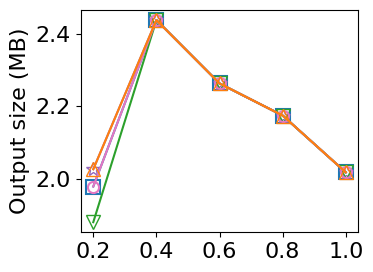

In [787]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['|D| size']
    # print (group['time'])
    plt.plot(X, group['minimal size'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add plot labels and legend
plt.ylabel('Output size (MB)')  # Label for y-axis

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp2_dblp_vary_d_out.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

IncMiner
IncMinerNS
IncMinerNoO
IncMinerT
batch


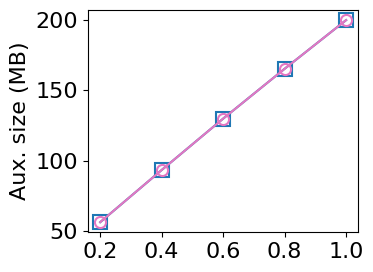

In [788]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

labels_to_show = ["IncMiner", "IncMinerT"]

for label, group in groups:
    print (label)
    if label not in labels_to_show:
        continue
    X = group['|D| size']
    # print (group['time'])
    plt.plot(X, group['auxiliary size'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add plot labels and legend
plt.ylabel('Aux. size (MB)')  # Label for y-axis

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp2_dblp_vary_d_aux.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

IncMiner
IncMinerNS
IncMinerNoO
batch


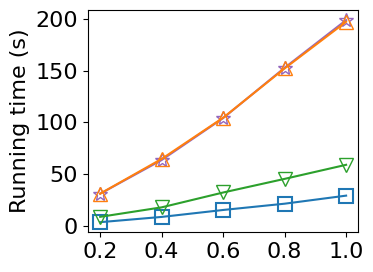

In [445]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['|D| size']
    # print (group['time'])
    plt.plot(X, group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp2_dblp_vary_d_time.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

IncMiner
IncMinerNS
IncMinerNoO
batch


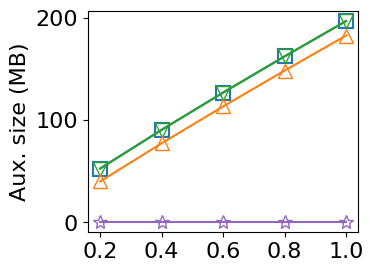

In [446]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['|D| size']
    # print (group['time'])
    plt.plot(X, group['auxiliary size'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add plot labels and legend
plt.ylabel('Aux. size (MB)')  # Label for y-axis

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp2_dblp_vary_d_aux.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

# Exp-3

In [635]:
# dfs = pd.read_excel('result_vary_s.xlsx', sheet_name=None)
# dfs = pd.read_excel('result_vary_s_0727.xlsx', sheet_name=None)
print(dfs.keys())

dict_keys(['vary |S|'])


In [798]:
df = dfs['vary |S|']
df = pre_process_exp1(df)

IncMiner
IncMinerT


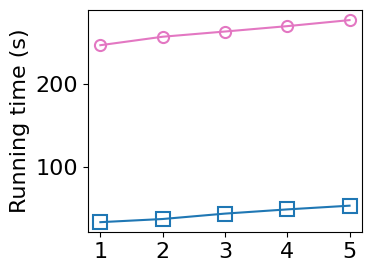

In [799]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['K']
    # print (group['time'])
    plt.plot(X, group['time'], label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add plot labels and legend
plt.ylabel('Running time (s)')  # Label for y-axis

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp3_hospital_s_time.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 

IncMinerT 247.194 277.642
IncMiner 32.531 52.538


/var/folders/mv/j_58gf917nd0c2nczfjyc3900000gn/T/ipykernel_7880/2289788834.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group['time'] = group['time'].apply(


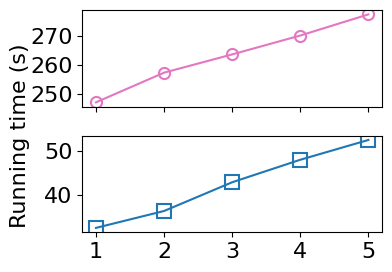

In [800]:
# Group by the "label" column
groups = df.groupby('Baseline')

# # Create a figure with two subplots (vertically stacked)
# fig, (ax_top, ax_bottom) = plt.subplots(2, 1, sharex=True)
# Create subplots with adjusted heights
fig, (ax_top, ax_bottom) = plt.subplots(
    2, 1,  # Two subplots stacked vertically
    sharex=True,
    gridspec_kw={'height_ratios': [2, 2]}  # Set the relative heights
)


top_labels = ['IncMinerT', ]
bottom_labels = ['IncMiner']

# Calculate the global maximum value of numeric 'time' across all groups
global_max_time = df['time'][pd.to_numeric(df['time'], errors='coerce').notna()].max()
timeout_value = global_max_time*1.1

# Plot for labels in the top box
for label in top_labels:
    group = groups.get_group(label)
    # Replace 'timeout' with a placeholder value at the top of the y-axis
    group['time'] = group['time'].apply(
        lambda x: timeout_value if x == 'timeout' else x
    )
    X = group['K']
    Y = group['time']
    print(label, min(Y), max(Y))
    ax_top.plot(
        X, group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    
    # Add 'TO' tick to the top subplot
    # ax_top.set_yticks(list(ax_top.get_yticks())[:1] + [timeout_value])  # Add timeout_value to y-ticks
    # ax_top.set_yticklabels([str(int(tick)) if tick != timeout_value else 'TO' for tick in ax_top.get_yticks()[:2]])

# Plot for other labels in the bottom box
for label in bottom_labels:
    group = groups.get_group(label)
    X = group['K']
    Y = group['time']
    print(label, min(Y), max(Y))
    ax_bottom.plot(
        X, group['time'], label=label,
        marker=markerMap[label], color=colorMap[label],
        markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
        markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
        markersize=markerStyleMap[label].get('markersize', 10)
    )
    

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

fig.text(0.01, 0.5, ylabel_time, va='center', rotation='vertical')

# Adjust layout
plt.tight_layout()

# Save the plot
outfile = "plots/exp3_hospital_s_time.pdf"
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show()

IncMiner
0    10.913595
1     8.252622
2     7.383578
3     6.924337
4     6.646452
Name: auxiliary size(MB), dtype: float64
IncMinerT
5    10.913595
6     8.252622
7     7.383578
8     6.924337
9     6.646452
Name: auxiliary size(MB), dtype: float64


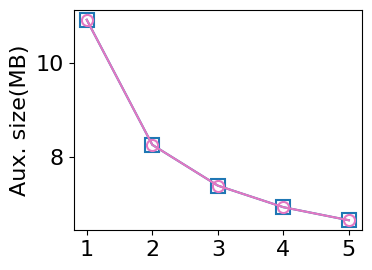

In [802]:
# Group by the "label" column
groups = df.groupby('Baseline')

# Create a plot for each group
plt.figure()

for label, group in groups:
    print (label)
    X = group['K']
    print (group['auxiliary size(MB)'])
    plt.plot(X, # group['sample number'], 
                group['auxiliary size(MB)'],
             label=label, marker=markerMap[label],color=colorMap[label],
                markerfacecolor=markerStyleMap[label].get('markerfacecolor', 'auto'),
                markeredgewidth=markerStyleMap[label].get('markeredgewidth', 1.0),
                markersize=markerStyleMap[label].get('markersize', 10)
            ) 
    
# Add plot labels and legend
# plt.ylabel('# Samples')  # Label for y-axis
plt.ylabel('Aux. size(MB)')  # Label for y-axis

xtick_labels = [str(value) for value in X]
plt.xticks(X, xtick_labels)

if VERBOSE:
    plt.xlabel('delta eta')  # Label for x-axis
    plt.title(tab)
    plt.legend()
    
outfile = "plots/exp3_hospital_s_size.pdf"
plt.tight_layout()
plt.savefig(outfile, bbox_inches='tight')

# Display the plot
plt.show() 